In [130]:
import random                       # random이라는 라이브러리를 가져옴(import)

import numpy as np                 # numpy도 라이브러리임. np라고 사용하고 이를 가져옴.

import matplotlib.pyplot as plt    # matplotlib은 그래프, 히스토그램 등 시각화하는 라이브러리임. plt라고 사용하고 이를 가져옴.


# 주가라는 클래스를 생성.
class Stock() :
    
    # init은 생성자로 클래스의 인스턴스를 작성할 때 스스로 멤버변수가 초기화게 해줌. 
    def __init__(self, volatility, stock_price, expected_rate) :
        self.v = volatility                          # (1년간) 주가 변동성
        self.p = stock_price                         # 주가
        self.r = expected_rate                       # (1년간) 주가 기대 수익률
        self.real_stock_price_history = []           # 멤버변수인 real_stock_price_history 는 현재 구해진 값이 없기 떄문에 공백
        self.expected_stock_price_history = []       # 멤버변수인 expected_stock_price_history는 현재 구해진 주가가 없기 때문에 공백 상태이다.
        print('주식 정보')
      
    
    
    
 # T년 후의 주가를 구하는 멤버함수
    def stock_price_move(self, T, seed, size) :
        
        
        # 원하는 seed를 넣기 위해 작성
        np.random.seed(seed)                   # seed : random처럼 보이는 정해진 순서의 첫번째 값을 결정하는factor

        # normal(m,s,size): 평균 = m, 표준편차 = s인 정규분포에서 size개의 샘플을 생성.
        z = np.random.normal(0, 1, size)     
        
        
                                               
        # 정규분포(=z)에서 나온 임의의 값을 이용해 T년 후의 주가를 size만큼 만들어냄
        expected_price = self.p * np.exp(((self.r - 0.5 * np.power(self.v, 2)) * T) + self.v * np.sqrt(T) * z )

        return expected_price        # return을 해야 원하는 값이 나온다.
        

   

 # 표본 평균과 표본 분산을 구하기 위해 작성한 멤버함수      
    def sample_mean_variance(self, T, seed, n) : 
        
        # 표본을 추출하여 미래 주가를 예상하는 멤버함수가 평균과 분산을 구하는데 필요해 호출했다.
        expected_price = self.stock_price_move(T, seed, size = n)       # 표본의 평균과 분산을 구하기 위해 표본주가를 구하는 멤버함수를 호출시킴.
        sample_mean = expected_price.mean()                             # mean : 평균 ==> 구해진 임의의 표본들의 평균을 구함.
        sample_var = expected_price.var(ddof=1)                         # var  : 분산 ==> 구해진 임의의 표본들의 분산을 구함.
        print('표본평균 :', sample_mean)                                # ddof =1 : 표본개수 - 1
        print('표본분산 :', sample_var)   
                                                     
                    # 표본 개수로 분산을 구하면 모분산에 비해 작아지는 경향이 있어 통계학적으로 (표본개수 -1)만큼으로 나눈다.
        
        
    
 # 모평균과 모분산을 구하기 위해 작성한 멤베함수 
    def real_mean_variance(self, T) :   # 함수 인자로 T(T년 후), stock_price(0년차 주가)
        
        # 모평균을 구하는 식 작성
        real_mean = self.p* np.exp(self.r * T) 
        
        # 모분산을 구하는 식 작성
        real_variance = (self.p** 2) * np.exp(2 * self.r * T) * (np.exp(np.power(self.v, 2) * T) -1 )
        
        # 위에서 작성한 모평균과 모분산을 출력하기 위해 작성
        print('모평균 :', real_mean)
        print('모분산 :', real_variance)
        
        
        
 # 사이즈에 따른 모평균과 표본평균 비교, 모분산과 표본분산의 비교해주는 함수.
    def Difference_between_real_sample(self, T, seed, size):
        sample_means = []                      #사이즈가 다른 표본평균을 넣을 empty 리스트 작성
        sample_variances = []                  #사이즈가 다른 표본분산을 넣을 empty 리스트 작성
        
        
       #이론상의 평균과 분산은 표본을 사용하지 않기에 일정한 값이다.(공식 사용)
        real_mean = self.p * np.exp(self.r * T)
        real_variance = (self.p ** 2) * np.exp(2 * self.r * T) * (np.exp(np.power(self.v, 2) * T) - 1)
        
        
        
        #주어진 size 범위 내에서 표본평균과 표본분산을 계산하도록 하는 for문
        for size in range(2, size +1) :                           
            #size가 0이나 1부터 시작할 경우 분산의 계산에서 자유도로 인해 (size-1)로 나누기 때문에 size=2부터가 의미있는 값이 된다.
            
            
            expected_price = self.stock_price_move(T, seed, size)  # 표본의 평균과 분산을 구하기 위해 표본주가를 구하는 멤버함수를 호출시킴.
            sample_mean = expected_price.mean()                    # mean : 평균 ==> 구해진 임의의 표본들의 평균을 구함.
            sample_var = expected_price.var(ddof=1)                # var  : 분산 ==> 구해진 임의의 표본들의 분산을 구함.
                                                                   # ddof : '자유도'로 표본분산을 구할 때 (size-1)로 나누어야함.
            
            sample_means.append(sample_mean)                       #사이즈에 따른 표본평균을 list의 함수인 append를 통해 순서대로 추가.
            sample_variances.append(sample_var)                    #사이즈에 따른 표본분산을 list의 함수인 append를 통해 순서대로 추가.
            
            
            
            
        
        # <모평균과 size에 따른 표본평균을 그래프로 나타내는 코드>
        
        plt.plot(np.arange(2, size+1), sample_means, 'b.', label='Sample Mean') 
        # np.arange(a,b)를 사용해 x값이 a부터 b-1까지임을 사용, y값은 사이즈에 따른 표본평균들(sample_means)
        
        plt.plot([2, size], [real_mean, real_mean], 'g-', label='Real Mean')
        # [2, size] : x축 값의 범위를 나타낸다. 2는 표본 크기의 최소값을 나타내고, size는 표본 크기의 최대값을 나타냅니다.
        #[real_mean, real_mean]: y축 값으로 실제 모평균 값을 나타낸다. 모평균은 사이즈에 상관없이 일정하므로 y축 값을 모두 모평균으로 작성
        
        plt.xlabel('Sample Size')                    #  xlabel(=x축)을 변수명 
        plt.ylabel('Mean')                           #  ylabel(=y축)을 변수명
        plt.title('Sample Mean vs. Real Mean')       #  그래프의 제목
        plt.grid()                                   #  그래프에 격자 추가
        plt.legend()                                 #  그래프의 이름(label)을 표현하기 위해 작성해야되는 코드 
        plt.show()

        
        # <모분산과 size에 따른 표본분산을 그래프로 나타내는 코드>
        
        plt.plot(np.arange(2, size+1), sample_variances, 'b.', label='Sample Variance')
        # np.arange(a,b)를 사용해 x값이 a부터 b-1까지임을 사용, y값은 사이즈에 따른 표본분산들(sample_variance)
        
        plt.plot([2, size], [real_variance, real_variance], 'g-', label='Real Variance')
        # [2, size] : x축 값의 범위를 나타낸다. 2는 표본 크기의 최소값을 나타내고, size는 표본 크기의 최대값을 나타냅니다.
        #[real_mean, real_mean]: y축 값으로 실제 모분산 값을 나타낸다. 모분산은 사이즈에 상관없이 일정하므로 y축 값을 모두 모분산으로 작성
        
        
        plt.xlabel('Sample Size')                          #  xlabel(=x축)을 변수명
        plt.ylabel('Variance')                             #  ylabel(=y축)을 변수명
        plt.title('Sample Variance vs. Real Variance')     #  그래프의 제목
        plt.grid()                                         #  그래프에 격자 추가
        plt.legend()                                       #  그래프의 이름(label)을 표현하기 위해 작성해야되는 코드
        plt.show()

        
        
      
     
    
    # 주가의 변동을 그래프로 그리기 이전에 해가 지날수록 변동된 표본주가 평균을 구하는 멤버 함수
    def Expected_stock_price_history(self, T, seed, size) :  # 함수 인자로 T(T년 후), stock_price(0년차 주가)
        
        # for문을 이용해 0년차부터 T년차까지의 주가의 표본평균 변동을 파악 
        for T in range(T + 1) : 
                                               
            expected_price = self.stock_price_move(T, seed, size)           # 표본의 평균을 구하기 위해 표본주가를 구하는 멤버함수를 또 다른 멤버함수에 호출시킴.
            sample_mean = expected_price.mean()                             # mean : 평균 ==> 구해진 임의의 표본들의 평균을 구함.
            
            self.expected_stock_price_history.append(sample_mean)            
            # 리스트의 함수인 append이용 : T년동안 변동된 표본평균 주가를 리스트 내에 추가한다.
            
            
            
        # 정상적으로 작동 되었는지 확인과정
        print(self.expected_stock_price_history)                    

        
        
        
    # 주가의 변동을 그래프로 그리기 이전에 해가 지날수록 변동된 실제주가 평균을 구하는 멤버 함수    
    def Real_stock_price_history(self, T) :
        
        
        # for문을 이용해 0년차부터 T년차까지의 주가 변동을 파악
        for T in range(T + 1) : 
            real_mean = self.p * np.exp(self.r * T)          # 이론상 주가평균 공식 작성
            
            self.real_stock_price_history.append(real_mean)       
            # 리스트의 함수인 append이용 : T년동안 변동된 실제평균 주가를 리스트 내에 추가한다.
            
            
        
        
        
 # 주가의 변동을 보여주는 그래프를 만들도록 하는 멤버함수.
    def plot_price_history(self, T):  
        
        plt.plot(self.expected_stock_price_history, 'b-', label = 'expected_stock_price')   # 표본으로 구한 예상 주가의 변동을 그래프로 그리고 선으로 이어주게 함.
        plt.plot(self.expected_stock_price_history, 'r.')                                   # 'b-' : 파란색 선, 'r.' : 빨간색 점 , label은 그래프의 이름.
        
    
        plt.plot(self.real_stock_price_history, 'g-',label = 'real_stock_price')            # 실제 평균으로 구한 주가의 변동을 그래프로 나타내는 코드
        plt.plot(self.real_stock_price_history, 'r.')                                       # 'g-' :초록색 선, 'r.' : 빨간색 점 , label은 그래프의 이름.
        
        plt.legend()                                 #  그래프의 이름(label)을 표현하기 위해 작성해야되는 코드
        plt.grid()                                   #  그래프에 격자 추가
        plt.xlabel('Year')                           #  xlabel(=x축)을 year이라는 변수명으로
        plt.ylabel('Stock Price')                    #  ylabel(=y축)을 주가라는 변수명으로
        plt.title('Expected Stock Price Movement')   #  title 즉, 그래프의 이름을 주가 변동으로 정했다.
        
        # 0부터 T까지 1씩 증가하는 x축 값 생성
        x = np.arange(0, T+1, 1)                     #np.arange(a,b,2) : a부터 b-1까지 2씩 증가하는 리스트 생성
        
        # x축의 눈금 위치와 레이블 설정
        plt.xticks(x)
        
        # 그래프를 보여주도록 하는 변수
        plt.show()                          

주식 정보
표본평균 : 110931.85699339173
표본분산 : 295005280.36235017
모평균 : 111277.04642462339
모분산 : 313466531.962416


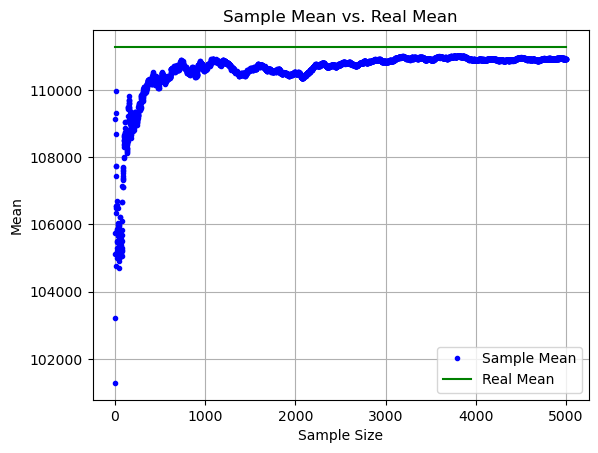

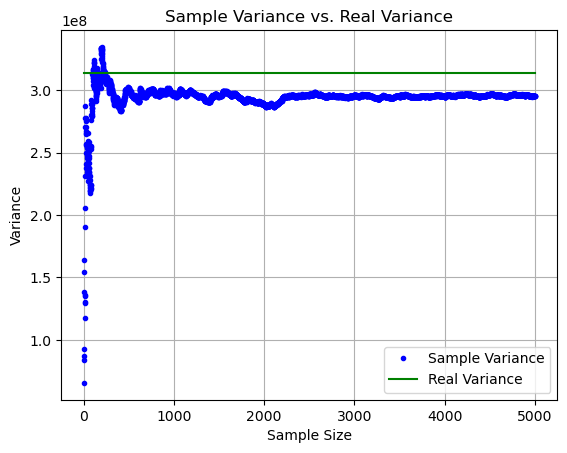

[50000.0, 54072.08549919604, 58532.37691984053, 63370.68801142398, 68614.60442197561, 74296.38166049946, 80451.67496468686, 87119.40549966767, 94341.8813606544, 102165.01269591742, 110638.5777338069]


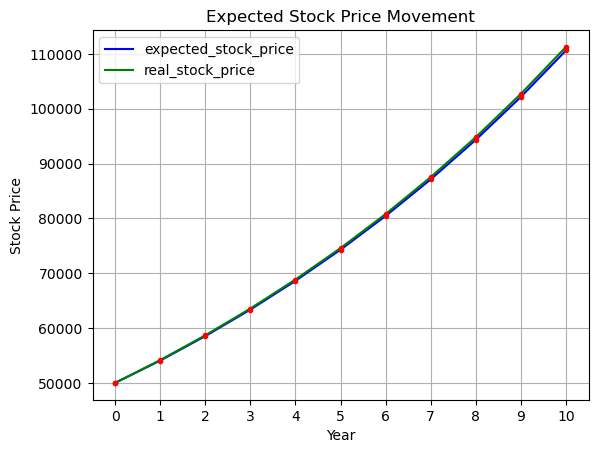

In [133]:
ajou = Stock(0.05, 50000, 0.08)

ajou.stock_price_move(10, 990, 5000)

print('='*150)

ajou.sample_mean_variance(10, 990, 5000)
ajou.real_mean_variance(10)

print('='*150)

ajou.Difference_between_real_sample(10, 990, 5000)

print('='*150)

ajou.Expected_stock_price_history(10, 990, 1000)
ajou.Real_stock_price_history(10)
ajou.plot_price_history(10)

In [128]:
import random                       # random이라는 라이브러리를 가져옴(import)

import numpy as np                 # numpy도 라이브러리임. np라고 사용하고 이를 가져옴.

import matplotlib.pyplot as plt    # matplotlib은 그래프, 히스토그램 등 시각화하는 라이브러리임. plt라고 사용하고 이를 가져옴.


# 주가라는 클래스를 생성.
class Stock() :
    
    # init은 생성자로 클래스의 인스턴스를 작성할 때 스스로 멤버변수가 초기화게 해줌. 
    def __init__(self, volatility, stock_price, expected_rate) :
        self.v = volatility                          # (1년간) 주가 변동성
        self.p = stock_price                         # 주가
        self.r = expected_rate                       # (1년간) 주가 기대 수익률
        print('주식 정보')
        
        
    # T년 후의 주가를 구하는 멤버함수
    def stock_price_move(self, T, seed, size) :
        
                # 원하는 seed를 넣기 위해 작성
        np.random.seed(seed)                   # seed : random처럼 보이는 정해진 순서의 첫번째 값을 결정하는factor
        
        # normal(m,s,size): 평균 = m, 표준편차 = s인 정규분포에서 size개의 샘플을 생성.
        z = np.random.normal(0, 1, size)     
        
                                               
        # 정규분포(=z)에서 나온 임의의 값을 이용해 T년 후의 주가를 size만큼 만들어냄
        expected_price = self.p * np.exp(((self.r - 0.5 * np.power(self.v, 2)) * T) + self.v * np.sqrt(T) * z )

        return expected_price        # return을 해야 원하는 값이 나온다.

In [129]:
ajou = Stock(0.05, 50000, 0.08)



주식 정보


In [111]:
ajou.stock_price_move(10, 990, 10)

array([107016.7750506 ,  95563.51385015, 114682.80278535,  95594.01894054,
       112727.38057006, 129240.47153613, 105899.77861386,  91655.71479717,
       105997.36077865, 115952.96623536])

In [112]:
ajou.sample_mean_variance(10, 990, 10)
ajou.real_mean_variance(10)

print('='*25)

ajou.sample_mean_variance(10, 990, 100)
ajou.real_mean_variance(10)

print('='*25)

ajou.sample_mean_variance(10, 990, 1000)
ajou.real_mean_variance(10)

print('='*25)

ajou.sample_mean_variance(10, 990, 10000)
ajou.real_mean_variance(10)

표본평균 : 107433.07831578705
표본분산 : 129255524.31076476
모평균 : 111277.04642462339
모분산 : 313466531.962416
표본평균 : 108387.12007734488
표본분산 : 314237601.4133083
모평균 : 111277.04642462339
모분산 : 313466531.962416
표본평균 : 110638.5777338069
표본분산 : 297653694.11758137
모평균 : 111277.04642462339
모분산 : 313466531.962416
표본평균 : 111096.384418641
표본분산 : 302467594.54338366
모평균 : 111277.04642462339
모분산 : 313466531.962416
